# Task 3: Customer Churn Prediction

Develop a model to predict customer churn for a subscription-based service or business. Use historical customer data, including features like usage behavior and customer demographics, and try algorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,roc_curve


# Data Preprocessing

In [5]:
#load the dataset
df= pd.read_csv("C:/Users/mahi/Documents/Churn Prediction/Churn_Modelling.csv")
display(df.head())
print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


(10000, 14)


In [6]:
display(df.describe())

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#rename 'Exited' to 'churn'
df.rename(columns={'Exited':'churn'},inplace=True)

# Data Visualization

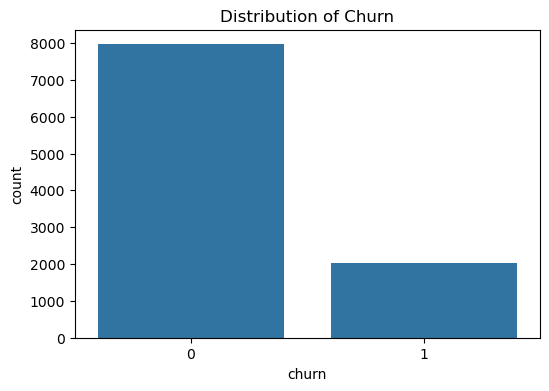

In [9]:
#distribution of Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn')
plt.show()

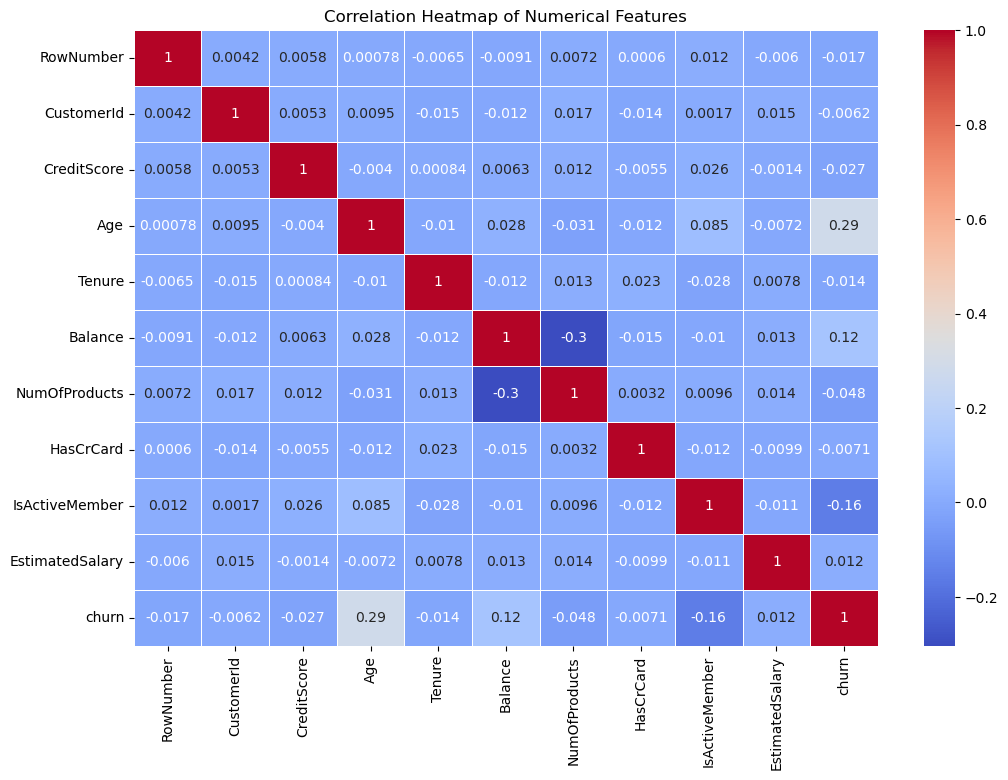

In [10]:
# Correlation Heatmap
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [11]:
#defining X and y
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'churn'], axis=1)  
y = df['churn']

# Model Training

In [13]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
#defining
categorical_cols = ['Geography', 'Gender']
#encoding 
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)


In [15]:
#defining Logistic Regression, random forest and gradient boosting
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

In [16]:
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
print(log_pred)

[0 0 0 ... 0 0 0]


C:\Users\mahi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(rf_pred)

[0 0 0 ... 1 0 0]


In [18]:
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print(gb_pred)

[0 0 0 ... 1 0 0]


# Model Evaluation

CLASSIFICATION REPORT

In [21]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.58      0.21      0.31       393

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.78      0.81      0.78      2000



In [22]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [23]:
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



CONFUSION MATRIX

Text(0.5, 1.0, 'Gradient Boosting')

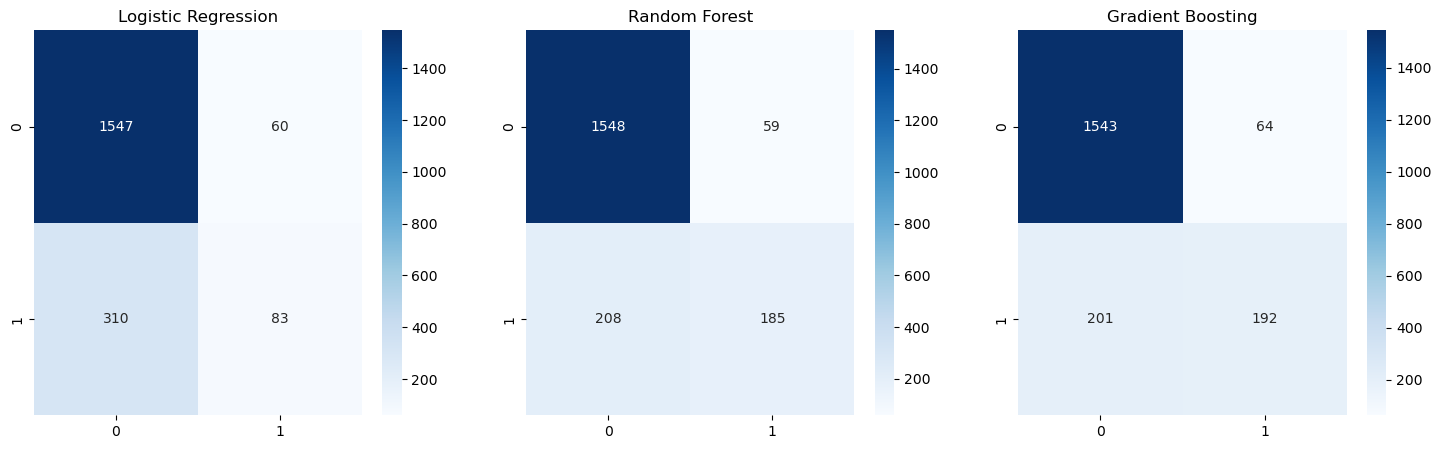

In [25]:
#Logistic Regression
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
cm_log = confusion_matrix(y_test, log_pred)
sns.heatmap(cm_log, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Logistic Regression')

#Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('Random Forest')

#Gradient Boosting
cm_gb = confusion_matrix(y_test, gb_pred)
sns.heatmap(cm_gb, annot=True, fmt='d', ax=ax[2], cmap='Blues')
ax[2].set_title('Gradient Boosting')

ROC AUC Curve

In [27]:
# ROC AUC Score
log_roc_auc = roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
gb_roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])

print("Logistic Regression ROC AUC Score:", log_roc_auc)
print("Random Forest ROC AUC Score:", rf_roc_auc)
print("Gradient Boosting ROC AUC Score:", gb_roc_auc)




Logistic Regression ROC AUC Score: 0.7624103199899928
Random Forest ROC AUC Score: 0.8645208383804316
Gradient Boosting ROC AUC Score: 0.8729057510794853


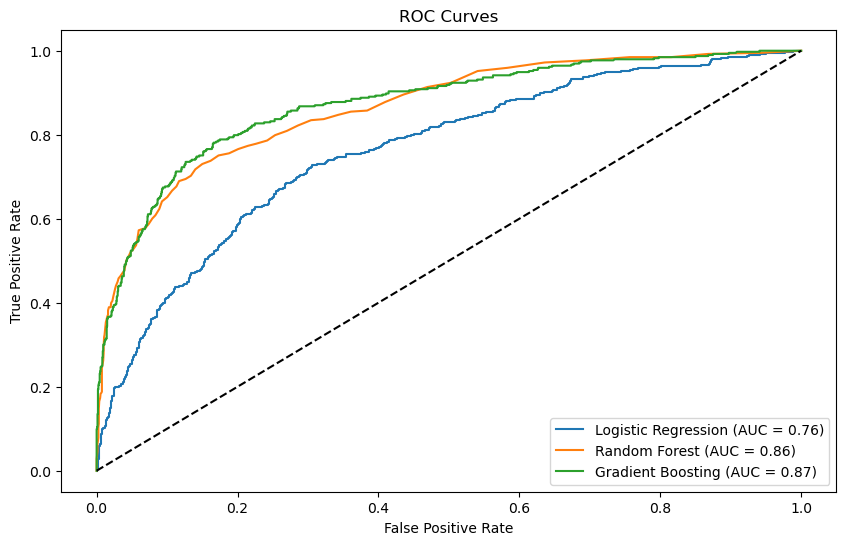

In [28]:
# Plot ROC Curves
plt.figure(figsize=(10, 6))

fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {log_roc_auc:.2f})')

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')

fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {gb_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.show()